In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

d:\Anaconda\envs\pm3bap\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# reading the data and add columns name
columns = ['flength','fwidth','fsize','fconc','fconc1','fasym','fm3long','fm3trans','falpha','fdist','class']
df = pd.read_csv("magic04.csv", names=columns)
df.head()
#df['class'].unique()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
def ClassToBin(Class):
    if Class == 'g':
        return 0
    else:
        return 1
    
df["class"]=df["class"].apply(ClassToBin)
df["class"].unique()


array([0, 1], dtype=int64)

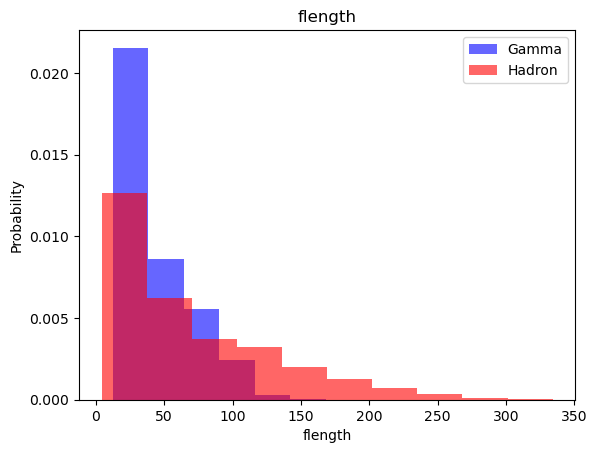

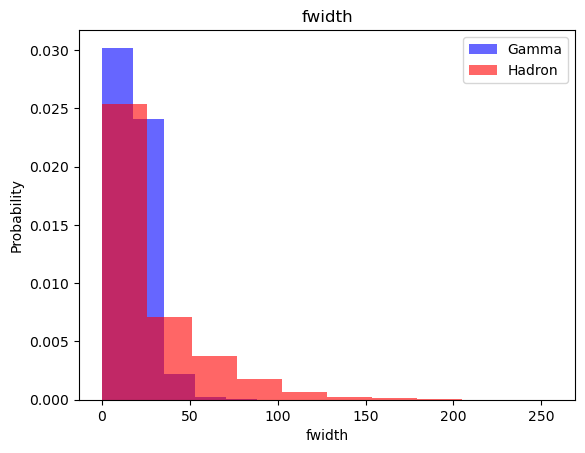

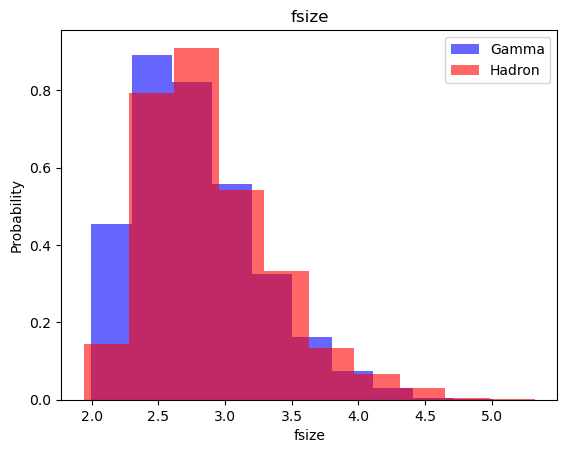

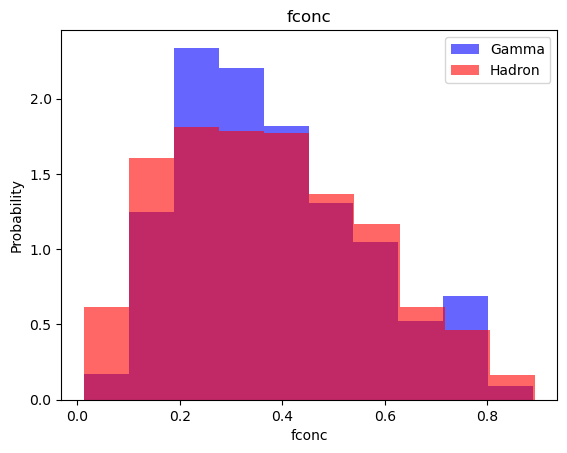

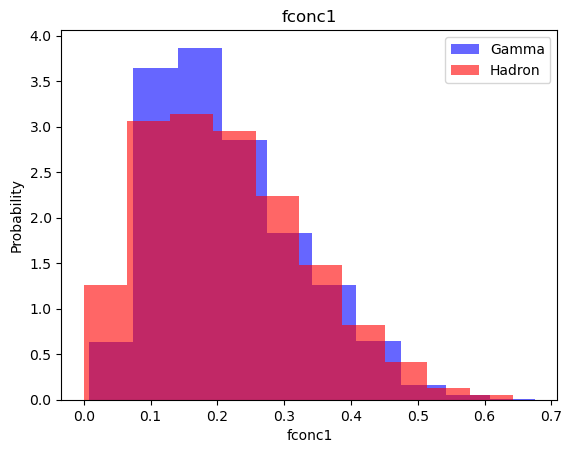

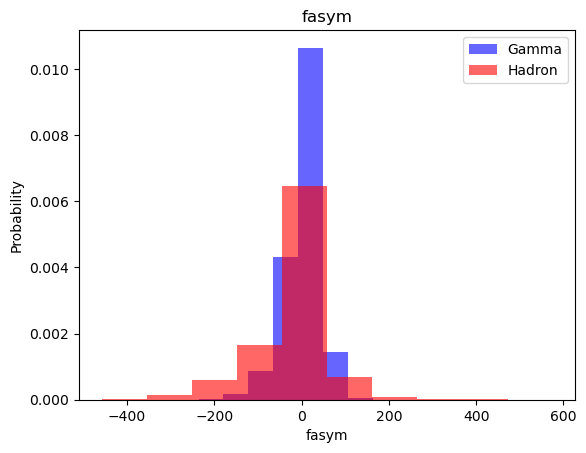

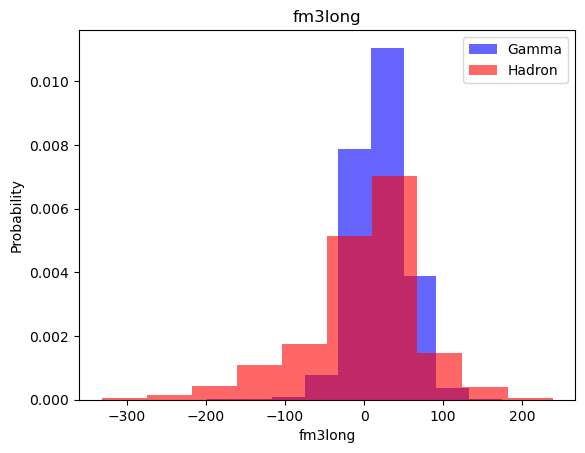

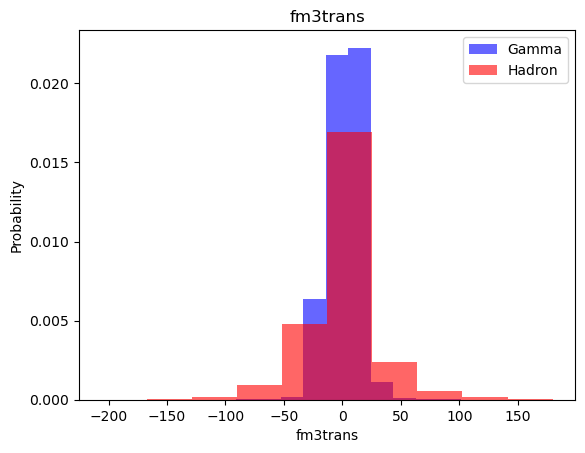

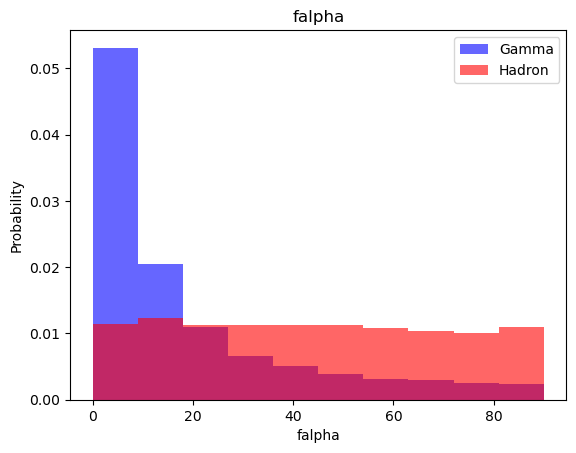

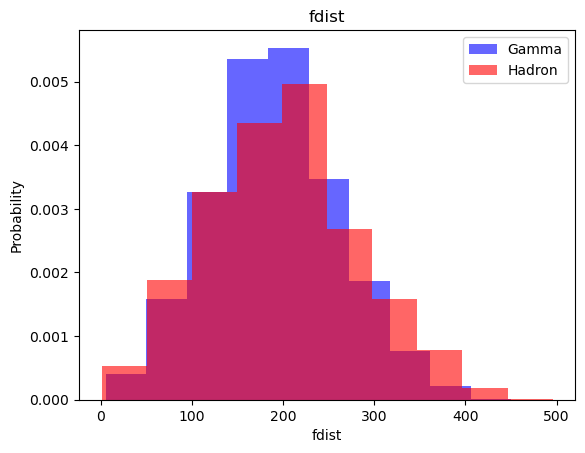

In [4]:
# plotting histograms to see the realtion

# Applying boolean mask -> df[df['class']=='g']

# Certainly! Let's break down the code df[df['class']==0][col] step by step:

# df['class']==0 creates a boolean mask that checks whether each element in the 'class' column of the DataFrame df is equal to 0. This results in a boolean
# Series with the same length as the DataFrame.
# df[df['class']==0] applies the boolean mask to the DataFrame df, returning only the rows where the 'class' column value is 0. In other words, 
# it filters the DataFrame to include only the rows where the condition is True.
# df[df['class']==0][col] selects the column specified by the variable col from the filtered DataFrame. 
# It returns a Series containing the values of that column for the rows where the 'class' column value is 0.
# Putting it all together, df[df['class']==0][col] retrieves the values of the column specified by col from the DataFrame
# df but only for the rows where the 'class' column value is 0.

for col in columns[:-1]:
    plt.hist(df[df['class']==0][col], color='blue', label='Gamma', alpha=0.6, density=True) 
    plt.hist(df[df['class']==1][col], color='red', label='Hadron', alpha=0.6, density=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()


In [12]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])
train['class'].value_counts()

0    7359
1    4053
Name: class, dtype: int64

In [13]:
def ScaleDataset(data, oversample=False):
    X = data.iloc[:,0:10]
    y = data.iloc[:,10]
    X = np.array(X)
    y = np.array(y)
    print(data)
    print (X)
    print (y)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X,np.reshape(y, (-1,1))))
    
    return data, X, y

In [14]:
train, x_train, y_train = ScaleDataset(train, oversample=True)
valid, x_valid, y_valid = ScaleDataset(valid, oversample=False) # No oversampling for validation and test datasets becasue i dont need to alter them as i wan to test my trained model on it
test, x_test, y_test = ScaleDataset(test, oversample=False)

       flength   fwidth   fsize   fconc  fconc1    fasym   fm3long  fm3trans  \
8746   38.5065  15.7785  2.7384  0.3434  0.1726  55.5708  -21.7275   12.5960   
4218   38.3618  17.6670  2.6561  0.4547  0.2417  32.7200   35.3398   -9.6262   
16380  76.2773  28.4018  2.8880  0.4118  0.2128  68.0222   56.0183   24.7618   
2301   22.7566  11.7950  2.4158  0.5797  0.4050  23.1034   16.5853   -9.3735   
12804  58.7140  22.8368  2.7036  0.5431  0.2679 -39.1492  -67.8161  -12.8282   
...        ...      ...     ...     ...     ...      ...       ...       ...   
8112   42.0233  28.6937  3.0404  0.1868  0.1061  32.6467   27.2874   20.1560   
10151  42.3950  20.4129  3.0732  0.2552  0.1491  19.2145   32.6570   13.3838   
4007   23.7185   0.0000  2.1055  0.7686  0.4353 -23.8823  -17.1539   -0.0001   
18631  99.0831  85.1111  3.2690  0.1485  0.0842 -28.8498 -135.5270  -39.7947   
14210  25.6694   7.9491  2.3927  0.6680  0.3745  13.9514   18.2915    6.3585   

        falpha     fdist  class  
8746 

In [9]:
print(train)

[[-0.396859   -0.47704935 -0.12234752 ... -0.91783921 -0.52040541
   0.        ]
 [ 0.63439652 -0.04235833  0.95946494 ... -0.23484069 -1.13630499
   0.        ]
 [-0.48330295 -0.72052409 -1.15486167 ...  1.27125471 -1.15381897
   1.        ]
 ...
 [-0.75044548 -0.64962993 -0.65849319 ...  0.69448905 -0.21472496
   1.        ]
 [-0.35107106 -0.47731113  0.25701679 ...  0.58157994 -0.16672168
   1.        ]
 [ 1.33838552  0.39477599  1.23473152 ...  0.03923262  1.53981061
   1.        ]]


In [6]:
# Model application kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

kNN_model = KNeighborsClassifier(n_neighbors=5)
kNN_model.fit(x_train, y_train)

y_pred = kNN_model.predict(x_test)
print(y_test)
print(y_pred)

print(classification_report(y_test, y_pred))



NameError: name 'x_train' is not defined

In [9]:
# Model application NaiveBayes

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(x_train,y_train)

y_pred = NB_model.predict(x_test)
print(y_test)
print(y_pred)
print(classification_report(y_test,y_pred))

[0 1 1 ... 0 0 1]
[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      2470
           1       0.69      0.42      0.52      1334

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



In [10]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test) # By default, when you use the predict() method in scikit-learn's logistic regression model, it applies a threshold of 0.5 to the predicted probabilities. Instances with probabilities above 0.5 are classified as 1 (positive class), and instances with probabilities below 0.5 are classified as 0 (negative class).
print(y_test)
print(y_pred)
print(classification_report(y_test,y_pred))

[0 1 1 ... 0 0 1]
[0 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2470
           1       0.69      0.72      0.70      1334

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [11]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(y_test)
print(y_pred)
print(classification_report(y_test,y_pred))

[0 1 1 ... 0 0 1]
[0 1 1 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2470
           1       0.83      0.80      0.81      1334

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



In [12]:
# Load Data
# Define Keras Model
# Compile Keras Model
# Fit Keras Model
# Evaluate Keras Model
# Tie It All Together
# Make Predictions

import tensorflow as tf

def trainNN(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, x_valid, y_valid):
        
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation ='relu', input_shape = (10,)),
        tf.keras.layers.Dropout(dropout_prob), # helps prevent overfitting
        tf.keras.layers.Dense(num_nodes, activation ='relu'),
        tf.keras.layers.Dropout(dropout_prob), # helps prevent overfitting
        tf.keras.layers.Dense(1, activation ='sigmoid'),    
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid), verbose=0)
    return nn_model, history



In [13]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

num_nodes:  16 dropout_prob:  0 lr:  0.01 batch_size:  32


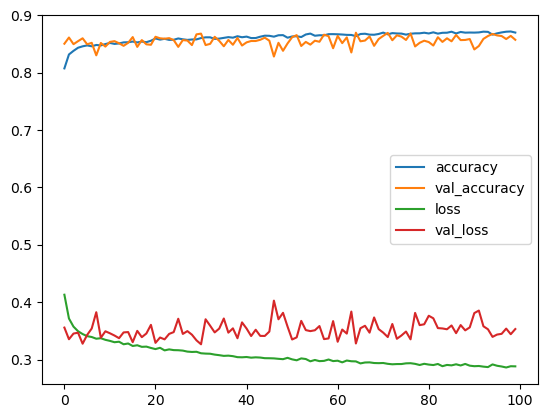

119/119 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8575
num_nodes:  16 dropout_prob:  0 lr:  0.01 batch_size:  64


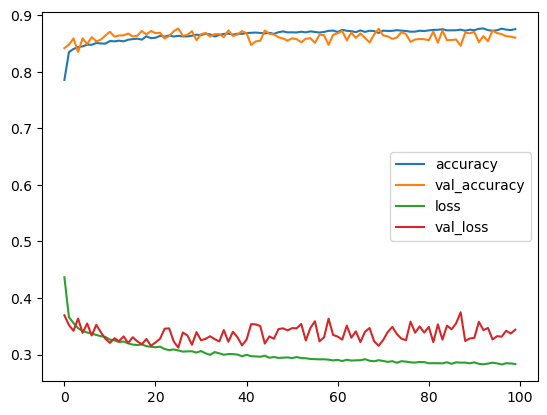

119/119 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8604
num_nodes:  16 dropout_prob:  0 lr:  0.01 batch_size:  128


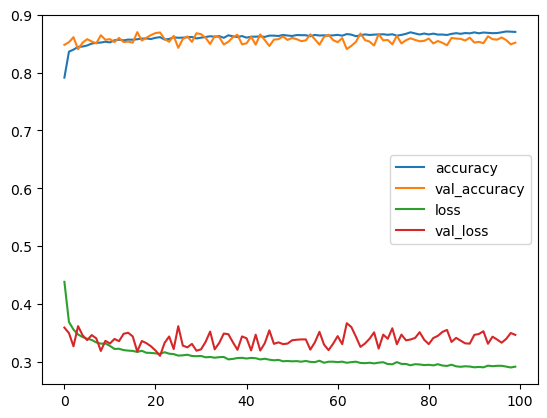

119/119 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8517
num_nodes:  16 dropout_prob:  0 lr:  0.005 batch_size:  32


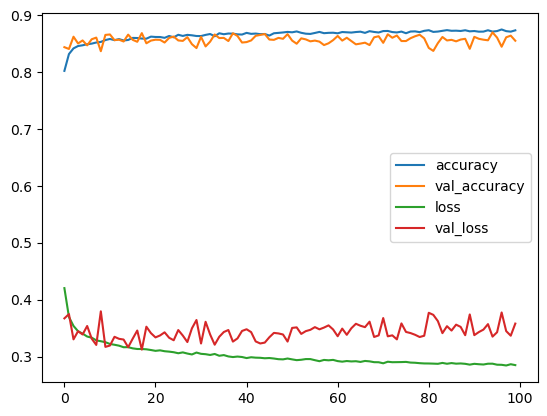

119/119 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8554
num_nodes:  16 dropout_prob:  0 lr:  0.005 batch_size:  64


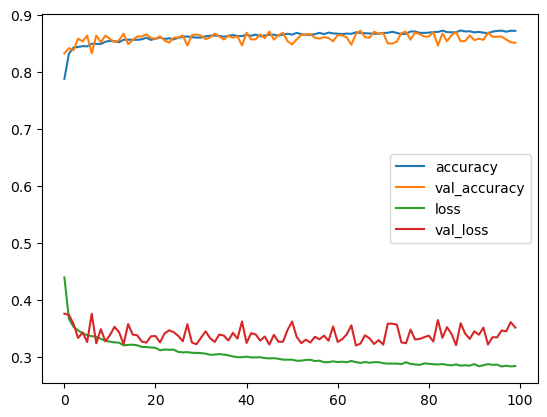

119/119 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8507
num_nodes:  16 dropout_prob:  0 lr:  0.005 batch_size:  128


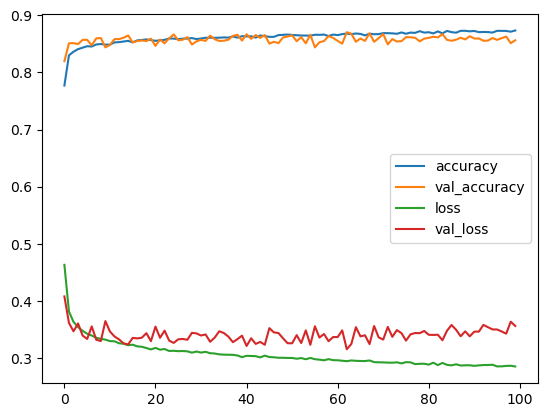

119/119 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8562
num_nodes:  16 dropout_prob:  0 lr:  0.001 batch_size:  32


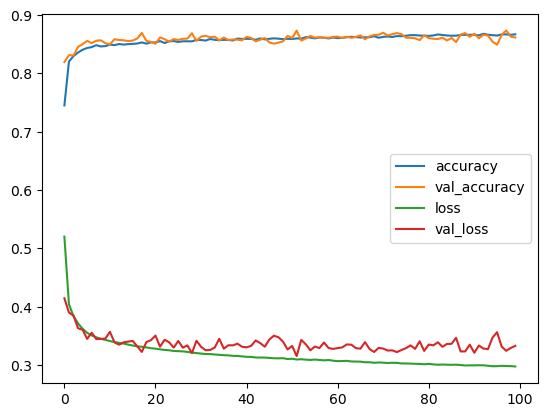

119/119 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8615
num_nodes:  16 dropout_prob:  0 lr:  0.001 batch_size:  64


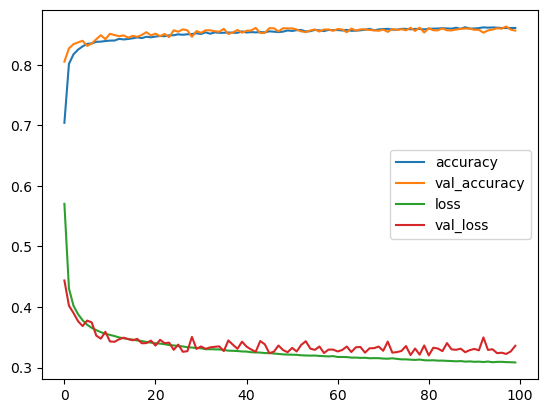

119/119 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8565
num_nodes:  16 dropout_prob:  0 lr:  0.001 batch_size:  128


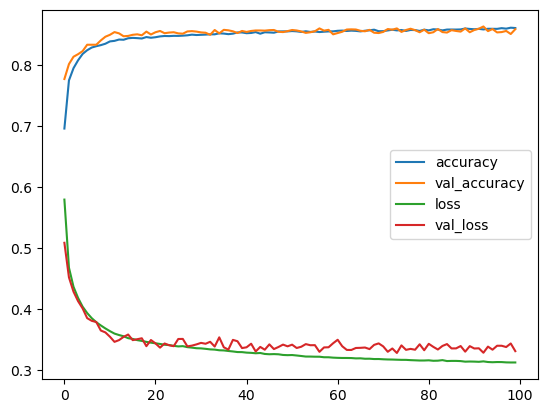

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8591
num_nodes:  16 dropout_prob:  0.2 lr:  0.01 batch_size:  32


KeyboardInterrupt: 

In [14]:
epochs = 100
best_nn = None
lowestErr = float('inf')

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                # print num_nodes, dropout_prob, lr, batch_size 
                print("num_nodes: ", num_nodes, "dropout_prob: ", dropout_prob, "lr: ", lr, "batch_size: ", batch_size)
                model, history = trainNN(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, x_valid, y_valid)
                plot_history(history)
                val_loss, val_accuracy = model.evaluate(x_valid, y_valid)
                if val_loss < lowestErr:
                    lowestErr = val_loss
                    best_nn = model

In [15]:
y_pred = best_nn.predict(x_test)
y_pred = np.reshape(y_pred, (-1,))
y_pred = (y_pred > 0.5).astype(int)
print(y_test)
print(y_pred)
print(classification_report(y_test,y_pred))

119/119 [==============================] - 0s 2ms/step
[0 1 1 ... 0 0 1]
[0 1 1 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2470
           1       0.83      0.80      0.81      1334

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

